Code repurposed from Kaggle [https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-cryptocurrencies]

## import dependencies

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from pathlib import Path
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

## load and inspect data

In [2]:
crypto_currency = 'ATOM1'
against_currency = 'USD'

start = dt.datetime(2019,1,1)
end = dt.datetime.now()

base_df = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start, end)
base_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-14,6.639943,6.353963,6.439715,6.526642,7318172.0,6.526642
2019-03-15,7.715249,6.432468,6.633174,7.504351,6057301.0,7.504351
2019-03-16,8.305615,6.694531,7.507990,7.383882,3477393.0,7.383882
2019-03-17,7.357443,4.727895,7.357443,4.776164,2653565.0,4.776164
2019-03-18,5.229982,4.828242,4.828242,5.110341,2567201.0,5.110341
...,...,...,...,...,...,...
2021-06-12,12.514607,11.318654,11.630677,12.500147,211088943.0,12.500147
2021-06-13,13.391230,12.243583,12.522619,12.611080,220702152.0,12.611080
2021-06-14,13.569646,12.668019,13.350577,13.360295,239421957.0,13.360295


In [3]:
base_df['Spread'] = base_df.High - base_df.Low
base_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 800 entries, 2019-03-14 to 2021-06-18
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       800 non-null    float64
 1   Low        800 non-null    float64
 2   Open       800 non-null    float64
 3   Close      800 non-null    float64
 4   Volume     800 non-null    float64
 5   Adj Close  800 non-null    float64
 6   Spread     800 non-null    float64
dtypes: float64(7)
memory usage: 50.0 KB


## Plot the closing value of Cosmos over time

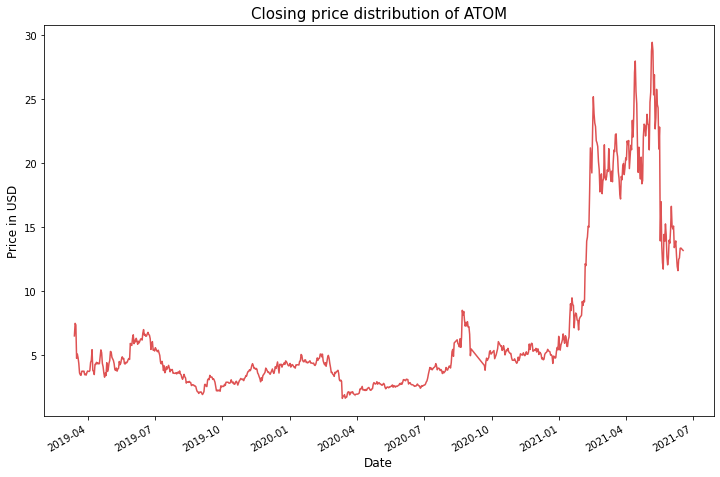

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(y = base_df.Close.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of ATOM", fontsize=15)
plt.show()

## Candlestick chart

In [5]:
import matplotlib.ticker as mticker
import mplfinance as mpf

#base_df['Date_mpl'] = base_df['Date'].apply(lambda x: mdates.date2num(x))

temp_base_df = base_df.copy(deep=False)
#temp_base_df = temp_base_df.set_index(['Date'])
temp_base_df = temp_base_df.drop(['Spread'], axis=1)
temp_base_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-14,6.639943,6.353963,6.439715,6.526642,7318172.0,6.526642
2019-03-15,7.715249,6.432468,6.633174,7.504351,6057301.0,7.504351
2019-03-16,8.305615,6.694531,7.507990,7.383882,3477393.0,7.383882
2019-03-17,7.357443,4.727895,7.357443,4.776164,2653565.0,4.776164
2019-03-18,5.229982,4.828242,4.828242,5.110341,2567201.0,5.110341
...,...,...,...,...,...,...
2021-06-12,12.514607,11.318654,11.630677,12.500147,211088943.0,12.500147
2021-06-13,13.391230,12.243583,12.522619,12.611080,220702152.0,12.611080
2021-06-14,13.569646,12.668019,13.350577,13.360295,239421957.0,13.360295


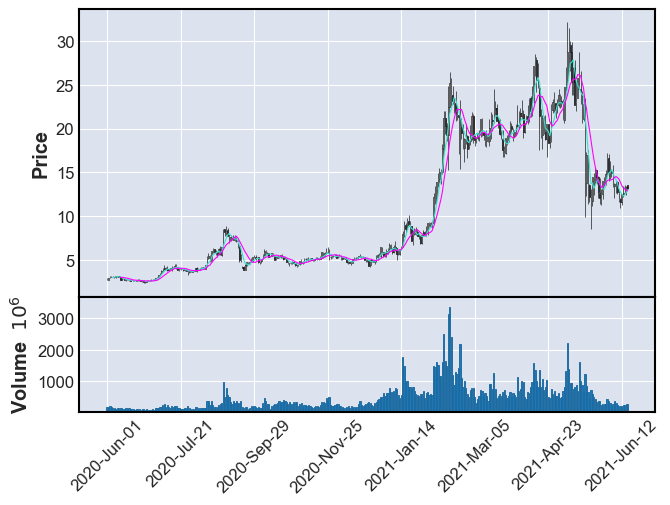

In [6]:
mpf.plot(temp_base_df.loc['2020-6-1':], type='candle', mav=(5,10), volume=True)

## Future Price Prediction

In [7]:
from fbprophet import Prophet

In [8]:
base_df

,High,Low,Open,Close,Volume,Adj Close,Spread
Date,,,,,,,
2019-03-14,6.639943,6.353963,6.439715,6.526642,7318172.0,6.526642,0.285980
2019-03-15,7.715249,6.432468,6.633174,7.504351,6057301.0,7.504351,1.282781
2019-03-16,8.305615,6.694531,7.507990,7.383882,3477393.0,7.383882,1.611084
2019-03-17,7.357443,4.727895,7.357443,4.776164,2653565.0,4.776164,2.629548
2019-03-18,5.229982,4.828242,4.828242,5.110341,2567201.0,5.110341,0.401740
...,...,...,...,...,...,...,...
2021-06-12,12.514607,11.318654,11.630677,12.500147,211088943.0,12.500147,1.195953
2021-06-13,13.391230,12.243583,12.522619,12.611080,220702152.0,12.611080,1.147647
2021-06-14,13.569646,12.668019,13.350577,13.360295,239421957.0,13.360295,0.901627


In [9]:
price_predict_df = base_df['Close'].copy(deep=False).reset_index()
price_predict_df.columns = ["ds", "y"]
price_predict_df = price_predict_df[price_predict_df['ds']>'2020-1-1']
price_predict_df

,ds,y
294,2020-01-02,4.091817
295,2020-01-03,4.247897
296,2020-01-04,4.286356
297,2020-01-05,4.231877
298,2020-01-06,4.104942
...,...,...
795,2021-06-12,12.500147
796,2021-06-13,12.611080
797,2021-06-14,13.360295
798,2021-06-15,13.381440


In [10]:
m = Prophet()
m.fit(price_predict_df);
future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
506,2021-06-21,19.255453,15.993990,22.622564
507,2021-06-22,19.207488,15.860445,22.566366
508,2021-06-23,19.254627,15.999012,22.474041
509,2021-06-24,19.205947,15.804983,22.642248
510,2021-06-25,19.186555,15.751128,22.803304


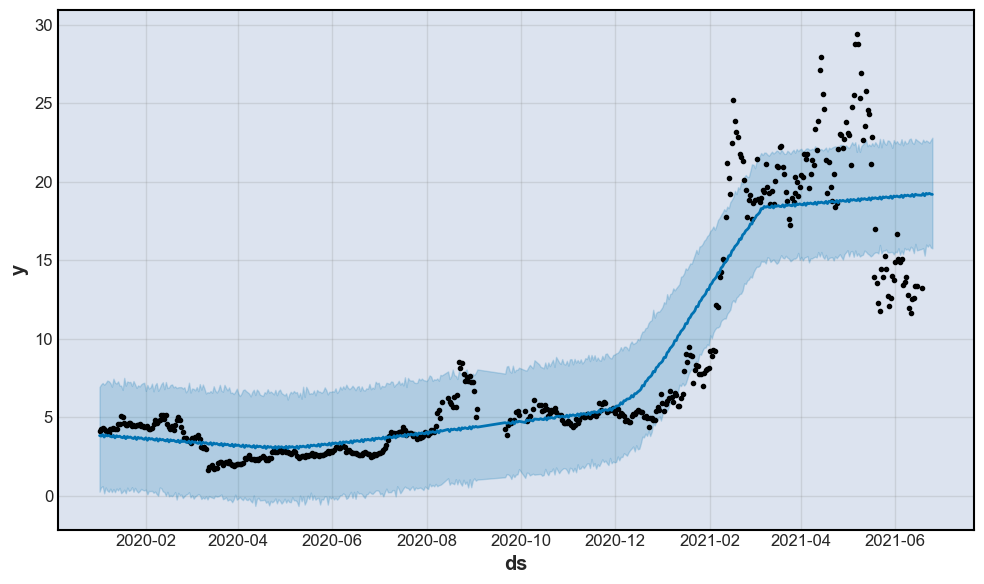

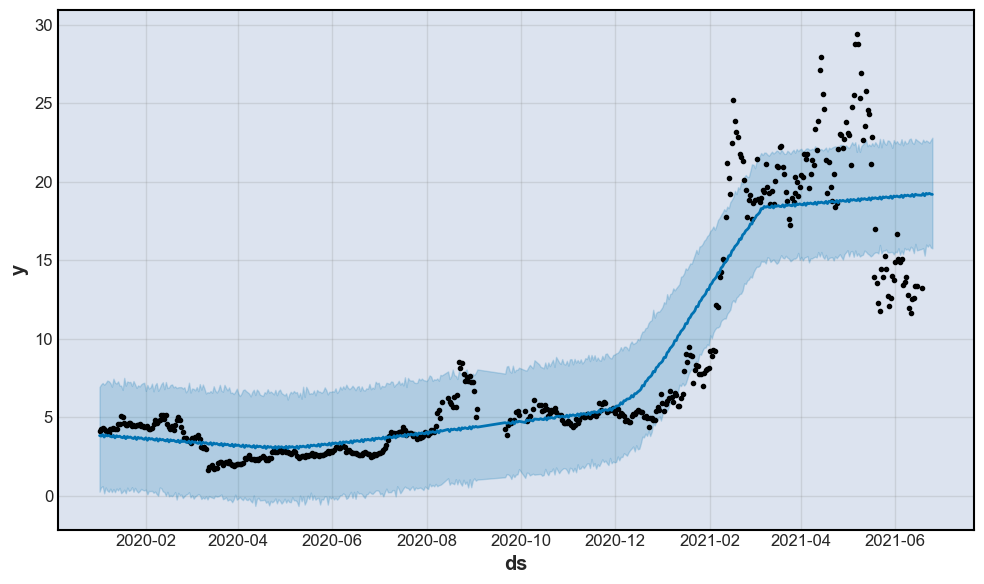

In [11]:
m.plot(forecast)

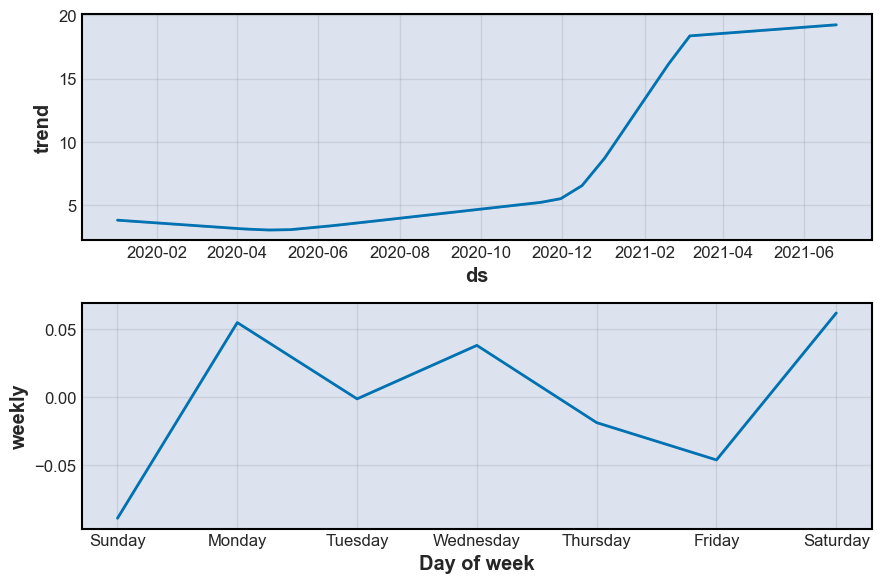

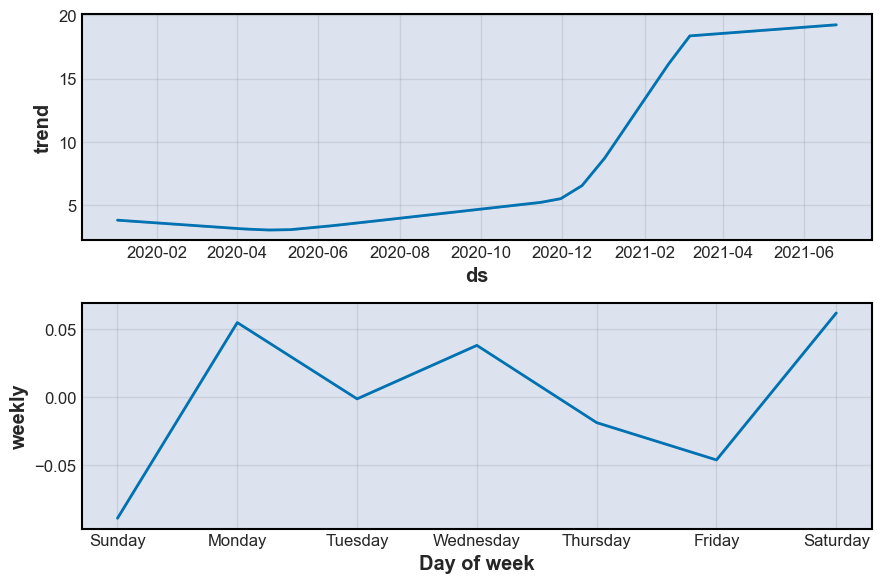

In [12]:
m.plot_components(forecast)